# MACHINE LEARNING ASSIGNMENT

### Zafrin sultana (19-39345-1)

An artificial neural network will be applied to correctly identify any image.For this task,the CIFAR-10 dataset will be used.Once the dataset will be downloaded,all the training images and store in a list along with the corresponding labels need to be read. Neural netowrk model will be applied to do the prediction.

In [1]:
#importing required libraries..
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Loading and reading information about data

In [2]:
cifar=tf.keras.datasets.cifar10
(training_images,training_labels),(testing_images,testing_labels)=cifar.load_data()
print('Training dataset shape:', training_images.shape)
print('Training labels shape:', training_labels.shape)
print('Test dataset shape:', testing_images.shape)
print('Test labels shape:', testing_labels.shape)

Training dataset shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test dataset shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


### Visualizing dataset

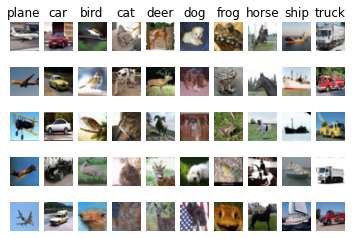

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #classes of the data
num_classes = len(classes) #number of class
samples_per_class = 5 
#visualizing 5 sample of each class
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(training_labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(training_images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Dividing image pixel by 255

In [4]:
#pixel comes in range 0 to 1
training_images=training_images/255.0
testing_images=testing_images/255.0

### Defining the model

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(20,activation='softmax')
])

### Compiling the model

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Training data to the model

In [7]:
model.fit(training_images,training_labels,epochs=10,batch_size=64)

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 1.9403 - accuracy: 0.2940
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 1.7383 - accuracy: 0.3728
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 1.6604 - accuracy: 0.4029
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 1.6128 - accuracy: 0.4193
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 1.5734 - accuracy: 0.4347
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 1.5456 - accuracy: 0.4447
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 1.5284 - accuracy: 0.4522
Epoch 8/10
782/782 [==============================] - 2s 3ms/step - loss: 1.5042 - accuracy: 0.4581
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 1.4906 - accuracy: 0.4626
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 1.4773 - accuracy: 0.4699

### Evaluating the model for testing data

In [8]:
test_loss,test_acc=model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.4962 - accuracy: 0.4645


### Testing the model

In [9]:
print("Test accuracy:",test_acc)
predictions=model.predict(testing_images) #predicting the data...
print("Predicted data for second index:",classes[np.argmax(predictions[2])]) #printing data predicted for 2nd index..
print("Actual data for the index:",classes[testing_labels[2][0]]) #actual data at index 2...

Test accuracy: 0.4645000100135803
Predicted data for second index: ship
Actual data for the index: ship


The predicted data and the actual data matched